<a href="https://colab.research.google.com/github/ugursirvermez/PyTorch_Education/blob/main/pytorch_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BİRİNCİ AŞAMA**

25 25 25 25


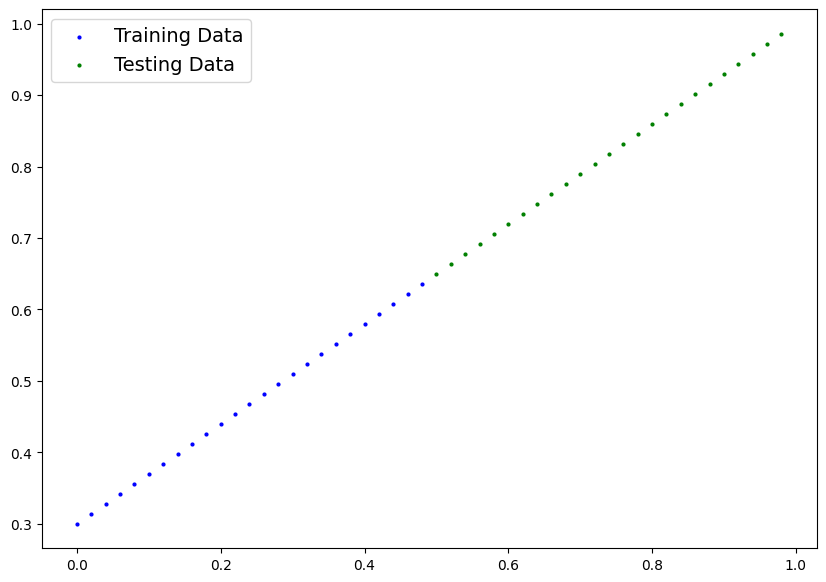

In [ ]:
import torch
from torch import nn # nn PyTorch'un nöral ağlarını yapılandırma (build) fonksiyonlarını içeren kütüphanedir.
import matplotlib.pyplot as plt # Bu kütüphane aşağıdaki notta açıklanmıştır.

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions): #Parametreleri fonksiyonu kullanırken dolduracağız.
	plt.figure(figsize=(10,7)) #Grafiğin kaça kaç çizileceğini söylüyorum.
  #Scatter çizmeyi ifade ediyor.
	plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data") #veriyi mavi renkte(c), 4 boyutunda(s) gormek istiyorum.
	plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data") #veriyi yeşil renkte(c), 4 boyutunda(s) gormek istiyorum.
	#eğer tahmin varsa...
	if predictions is not None:
		#tahmini yazdir
		plt.scatter(test_data, predictions, c="r", s=4, label="Predictions"),

	#Show the legend
	plt.legend(prop={"size": 14});

#Basit Örnek Parametreler
agirlik = 0.7 #degiskenimiz
sapma = 0.3 # Doğrusal regresyon formülündeki sapma miktari

#Create [Tasarim parametreleri]
start = 0 #Nereden baslayacak?
end = 1 #Ne olunca bitecek?
step = 0.02 #Ne kadar artacak? Sanki bir For döngüsü oluşturuyoruz!
X = torch.arange(start, end, step).unsqueeze(dim=1) # Yukarıdaki üç parametreyi bir tensöre ekliyoruz.
y = agirlik * X + sapma

#Create a trainin/test-split
train_split = int(0.5 * len(X)) #Eğitim bize tensordeki verinin 0.8 katsayısı kadar örnek versin.
#train_splitteki verileri iki değişkene yazdiralim.
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train), len(y_train), len(X_test), len(y_test)) # Bize 40, 40, 10, 10 değerlerini verecektir.
plot_predictions(X_train, y_train, X_test, y_test,None)

# **İKİNCİ AŞAMA**

40 40 10 10
tensor([[0.7566],
        [0.7605],
        [0.7643],
        [0.7682],
        [0.7720],
        [0.7759],
        [0.7797],
        [0.7835],
        [0.7874],
        [0.7912]])


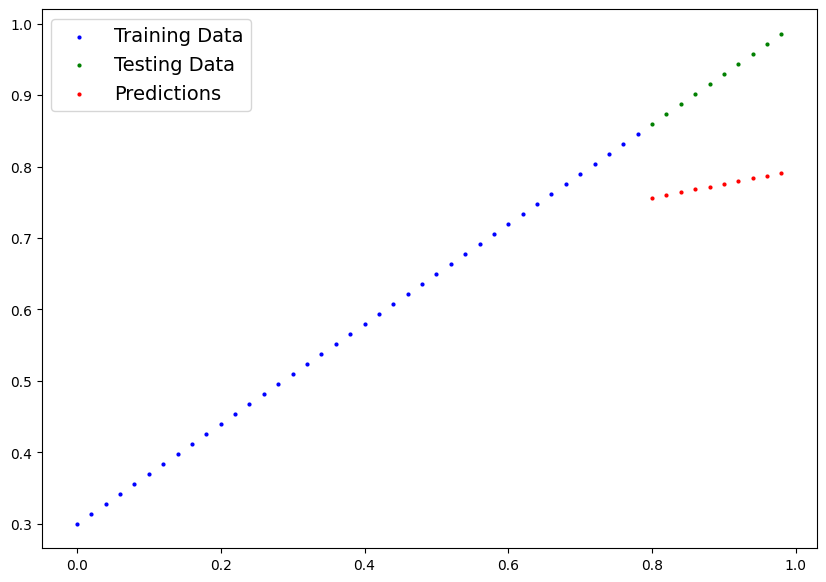

In [ ]:
import torch
from torch import nn

import torch
from torch import nn # nn PyTorch'un nöral ağlarını yapılandırma (build) fonksiyonlarını içeren kütüphanedir.
import matplotlib.pyplot as plt # Bu kütüphane aşağıdaki notta açıklanmıştır.

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions): #Parametreleri fonksiyonu kullanırken dolduracağız.
	plt.figure(figsize=(10,7)) #Grafiğin kaça kaç çizileceğini söylüyorum.
  #Scatter çizmeyi ifade ediyor.
	plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data") #veriyi mavi renkte(c), 4 boyutunda(s) gormek istiyorum.
	plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data") #veriyi yeşil renkte(c), 4 boyutunda(s) gormek istiyorum.
	#eğer tahmin varsa...
	if predictions is not None:
		#tahmini yazdir
		plt.scatter(test_data, predictions, c="r", s=4, label="Predictions"),

	#Show the legend
	plt.legend(prop={"size": 14});

#Basit Örnek Parametreler
agirlik = 0.7 #degiskenimiz
sapma = 0.3 # Doğrusal regresyon formülündeki sapma miktari

#Create [Tasarim parametreleri]
start = 0 #Nereden baslayacak?
end = 1 #Ne olunca bitecek?
step = 0.02 #Ne kadar artacak? Sanki bir For döngüsü oluşturuyoruz!
X = torch.arange(start, end, step).unsqueeze(dim=1) # Yukarıdaki üç parametreyi bir tensöre ekliyoruz.
y = agirlik * X + sapma

#Create a trainin/test-split
train_split = int(0.8 * len(X)) #Eğitim bize tensordeki verinin 0.8 katsayısı kadar örnek versin.
#train_splitteki verileri iki değişkene yazdiralim.
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train), len(y_train), len(X_test), len(y_test)) # Bize 40, 40, 10, 10 değerlerini verecektir.
#plot_predictions(X_train, y_train, X_test, y_test,None) #Fonskiyonumuzu burada çağırıyoruz.

class LinearRegressionModel(nn.Module): #nn.Module Nöral Network sınıfını içerdiğini gösteriyor.

	def __init__(self): #Kendisini başlatacağı fonksiyon.
		super().__init__() #Kendisini kalıtım yoluyla başltacağını belirten kod. Lütfen Python super() fonksiyonunu okuyunuz.
		#nn.parameter(data, required_grad)
		self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float)) # Parameter tensörlerin bir alt sınıfı, bir mdoül tensörüdür, bazı geçici durumları önbelleğe alabilir.
		self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float)) #requires_grad -> gradient descent'ın aktif olacağını bize söylüyor.

	def forward(self, x: torch.Tensor) -> torch.Tensor: # X verimiz olacak. Bütün alt sınıfları ezen forward fonksiyonunu oluşturduk.
		return self.weights * x + self.bias #Doğrusal regrasyon formülü

model_0 = LinearRegressionModel()

#Modelimizden tahminlerimizi üretelim.
with torch.inference_mode():
	y_preds = model_0(X_test)

print(y_preds)
plot_predictions(X_train, y_train, X_test, y_test,y_preds) #Fonskiyonumuzu burada çağırıyoruz.predictions = y_preds)

# **ÜÇÜNCÜ AŞAMA**

Loss: 0.31288138031959534


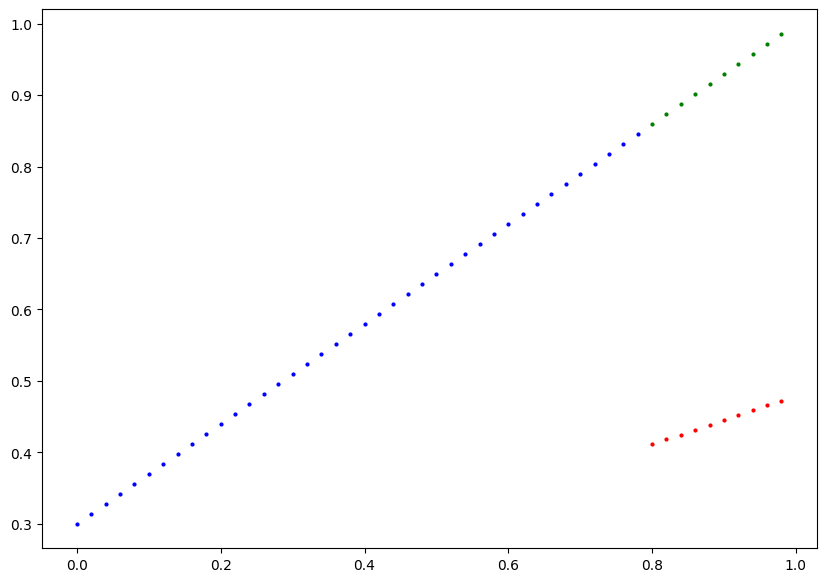

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions): #Parametreleri fonksiyonu kullanırken dolduracağız.
	plt.figure(figsize=(10,7)) #Grafiğin kaça kaç çizileceğini söylüyorum.
  #Scatter çizmeyi ifade ediyor.
	plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data") #veriyi mavi renkte(c), 4 boyutunda(s) gormek istiyorum.
	plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data") #veriyi yeşil renkte(c), 4 boyutunda(s) gormek istiyorum.
	#eğer tahmin varsa...
	if predictions is not None:
		#tahmini yazdir
		plt.scatter(test_data, predictions, c="r", s=4, label="Predictions"),

#Basit Örnek Parametreler
agirlik = 0.7 #degiskenimiz
sapma = 0.3 # Doğrusal regresyon formülündeki sapma miktari

#Create [Tasarim parametreleri]
start = 0 #Nereden baslayacak?
end = 1 #Ne olunca bitecek?
step = 0.02 #Ne kadar artacak? Sanki bir For döngüsü oluşturuyoruz!
X = torch.arange(start, end, step).unsqueeze(dim=1) # Yukarıdaki üç parametreyi bir tensöre ekliyoruz.
y = agirlik * X + sapma

#Create a trainin/test-split
train_split = int(0.8 * len(X)) #Eğitim bize tensordeki verinin 0.8 katsayısı kadar örnek versin.
#train_splitteki verileri iki değişkene yazdiralim.
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

class LinearRegressionModel(nn.Module): #nn.Module Nöral Network sınıfını içerdiğini gösteriyor.

	def __init__(self): #Kendisini başlatacağı fonksiyon.
		super().__init__() #Kendisini kalıtım yoluyla başltacağını belirten kod. Lütfen Python super() fonksiyonunu okuyunuz.
		#nn.parameter(data, required_grad)
		self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float)) # Parameter tensörlerin bir alt sınıfı, bir modül tensörüdür, bazı geçici durumları önbelleğe alabilir.
		self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float)) #requires_grad -> gradient descent'ın aktif olacağını bize söylüyor.

	def forward(self, x: torch.Tensor) -> torch.Tensor: # X verimiz olacak. Bütün alt sınıfları ezen forward fonksiyonunu oluşturduk.
		return self.weights * x + self.bias #Doğrusal regrasyon formülü -> Değerler * eğim + sapma


model_0 = LinearRegressionModel()

#Loss fonksiyonu (L1Loss)
loss_fn = nn.L1Loss()

#Optimizer fonksiyonu (Optim), lr= learning rate (Öğrenme Oranı) -> En önemli öğrenme parametresidir.
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01) # Stochastic Gradient Descent işlemi için kullanılır.
#lr'deki ondalık ne kadar artarsa o kadar az sapma miktarını değiştirir ve gözlemleriz. Virgülün sağındaki sıfır azalırsa tam tersi olur.

epochs = 1 # İlk döngümüz 10 kadar olacak.

torch.manual_seed(42)

#Eğitim Döngüsü Burada Yer Alıyor (Veriyi Döngüye Sokma)
for epoch in range(epochs): #Döngü başlatılıyor.

	#Eğitim modeli başlatılacak
	model_0.train() # PyTorch'ta eğitim modu -> model_0 ile başlatılacak. Parametreleri gradyenlere ihtiyaç duyar.

	#Forward Pass ile ilerletiyoruz.
	y_pred = model_0(X_train)

	#Kaybı Hesaplama
	loss = loss_fn(y_pred, y_train)
	print(f"Loss: {loss}")

	#Optimizer -> Kayıpları sıfırlama
	optimizer.zero_grad()

	#Kayıplara geri dönme
	loss.backward()

	#Gradyen Descent Uygulama. Öğrenme adımlarını azaltmaya çalışıyoruz. torch.autograd() kütüphanelerine geleceğiz burada.
	optimizer.step()

	#Gradyen takibini bırak ve test et!
	model_0.eval()

model_0.state_dict() #Modelin değişimini öğreniyoruz.

with torch.inference_mode():
	y_preds_new = model_0(X_test)

plot_predictions(X_train, y_train, X_test, y_test,y_preds_new)

# **DÖRDÜNCÜ AŞAMA**

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.4944015145301819
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1289]))])
Loss: 0.3127661347389221
Loss: 0.3126509487628937
Loss: 0.31253570318222046
Loss: 0.312420517206192
Loss: 0.312305212020874
Loss: 0.3121900260448456
Loss: 0.31207484006881714
Loss: 0.3119596540927887
Loss: 0.3118444085121155
Loss: 0.31172919273376465
Epoch: 10 | Loss: 0.31172919273376465 | Test loss: 0.49305421113967896
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1299]))])
Loss: 0.3116139769554138
Loss: 0.3114987313747406
Loss: 0.31138354539871216
Loss: 0.31126832962036133
Loss: 0.3111531138420105
Loss: 0.3110378682613373
Loss: 0.31092268228530884
Loss: 0.310807466506958
Loss: 0.3106922209262848
Loss: 0.31057703495025635
Epoch: 20 | Loss: 0.31057703495025635 | Test loss: 0.4917070269584656
OrderedDict([('weights', tensor([0.3375])), ('bias', tensor([0.1309]))])
Loss: 0.3104618191719055
Loss: 0.31034660

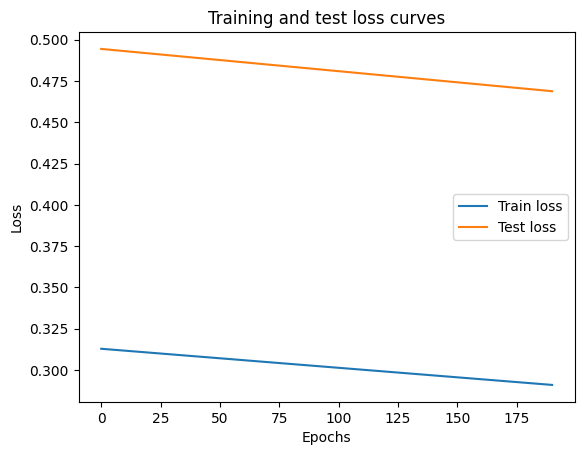

In [28]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions): #Parametreleri fonksiyonu kullanırken dolduracağız.
	plt.figure(figsize=(10,7)) #Grafiğin kaça kaç çizileceğini söylüyorum.
  #Scatter çizmeyi ifade ediyor.
	plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data") #veriyi mavi renkte(c), 4 boyutunda(s) gormek istiyorum.
	plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data") #veriyi yeşil renkte(c), 4 boyutunda(s) gormek istiyorum.
	#eğer tahmin varsa...
	if predictions is not None:
		#tahmini yazdir
		plt.scatter(test_data, predictions, c="r", s=4, label="Predictions"),

#Basit Örnek Parametreler
agirlik = 0.7 #degiskenimiz
sapma = 0.3 # Doğrusal regresyon formülündeki sapma miktari

#Create [Tasarim parametreleri]
start = 0 #Nereden baslayacak?
end = 1 #Ne olunca bitecek?
step = 0.02 #Ne kadar artacak? Sanki bir For döngüsü oluşturuyoruz!
X = torch.arange(start, end, step).unsqueeze(dim=1) # Yukarıdaki üç parametreyi bir tensöre ekliyoruz.
y = agirlik * X + sapma

#Create a trainin/test-split
train_split = int(0.8 * len(X)) #Eğitim bize tensordeki verinin 0.8 katsayısı kadar örnek versin.
#train_splitteki verileri iki değişkene yazdiralim.
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

class LinearRegressionModel(nn.Module): #nn.Module Nöral Network sınıfını içerdiğini gösteriyor.

	def __init__(self): #Kendisini başlatacağı fonksiyon.
		super().__init__() #Kendisini kalıtım yoluyla başltacağını belirten kod. Lütfen Python super() fonksiyonunu okuyunuz.
		#nn.parameter(data, required_grad)
		self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float)) # Parameter tensörlerin bir alt sınıfı, bir modül tensörüdür, bazı geçici durumları önbelleğe alabilir.
		self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float)) #requires_grad -> gradient descent'ın aktif olacağını bize söylüyor.

	def forward(self, x: torch.Tensor) -> torch.Tensor: # X verimiz olacak. Bütün alt sınıfları ezen forward fonksiyonunu oluşturduk.
		return self.weights * x + self.bias #Doğrusal regrasyon formülü -> Değerler * eğim + sapma

model_0 = LinearRegressionModel() #Sınıftan yeni bir model çağırdık.
torch.manual_seed(42)
list(model_0.parameters())

#Loss fonksiyonu (L1Loss)
loss_fn = nn.L1Loss()

#Optimizer fonksiyonu (Optim), lr= learning rate (Öğrenme Oranı) -> En önemli öğrenme parametresidir.
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.0001) # Stochastic Gradient Descent işlemi için kullanılır.
#lr'deki ondalık ne kadar artarsa o kadar az sapma miktarını değiştirir ve gözlemleriz. Virgülün sağındaki sıfır azalırsa tam tersi olur.

epochs = 200 # İlk döngümüz 1 kadar olacak.

#Asagidaki degerleri takip etmek icin tanimlanan diziler
epoch_count = []
loss_values = []
test_loss_values = []

#Eğitim Döngüsü Burada Yer Alıyor (Veriyi Döngüye Sokma)
for epoch in range(epochs): #Döngü başlatılıyor.

	#Eğitim modeli başlatılacak
	model_0.train() # PyTorch'ta eğitim modu -> model_0 ile başlatılacak. Parametreleri gradyenlere ihtiyaç duyar.

	#Forward Pass ile ilerletiyoruz.
	y_pred = model_0(X_train)

	#Kaybı Hesaplama
	loss = loss_fn(y_pred, y_train)
	print(f"Loss: {loss}")

	#Optimizer -> Kayıpları sıfırlama
	optimizer.zero_grad()

	#Kayıplara geri dönme
	loss.backward()

	#Gradyen Descent Uygulama. Öğrenme adımlarını azaltmaya çalışıyoruz. torch.autograd() kütüphanelerine geleceğiz burada.
	optimizer.step()

	#Gradyen takibini bırak ve test et!
	model_0.eval() #Bunu genelde farklı ayarlarda kapalı tutarız. Bazı katmanları silmek için kullanmayız.
	with torch.inference_mode(): # Gradyenleri takip etmeyi kapatır. Arkaplanda farklı bazı işlerde yapar. with torch.no_grad() ile benzerdir.
		#1.forward işlemini yap
		test_pred = model_0(X_test)
		#2. Kaybı(Loss) hesapla
		test_loss = loss_fn(test_pred, y_test)
		if epoch % 10 == 0: #kalan 0 ise degerleri yazdir. Her 10 da bir değer yazdırılır.
			#Degerleri dizilere yazdir.
			epoch_count.append(epoch)
			loss_values.append(loss)
			test_loss_values.append(test_loss)
			print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
			print(model_0.state_dict()) #Modelin değişimini öğreniyoruz. ağırlık ve sapma olarak öğreniyoruz ve yazdırıyoruz.

#Numpy olarak loss ve test loss değerlerini çevirelim. Yoksa plotlib'te hata verir
#Grafik olarak yazdıralım
#plot_predictions(X_train, y_train, X_test, y_test,y_preds_new)
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()